In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from nltk.util import ngrams
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import random
plt.rc('figure',figsize=(25,25))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ayushpatel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<p>In the code above below, I’ll be doing some text preprocessing of the functionality of our dataset, which contains the body of the tweet. Our goal is to perform sentiment analysis on clean text data to avoid noise and reading errors:

In [12]:
f_data = pd.read_csv('vaccination_tweets.csv')
f_data.text =f_data.text.str.lower()

#Remove twitter handlers
f_data.text = f_data.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
f_data.text = f_data.text.apply(lambda x:re.sub(r'\B#\S+','',x))


# Remove URLS
f_data.text = f_data.text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
f_data.text = f_data.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
f_data.text = f_data.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
f_data.text = f_data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

<h1>Covid-19 Vaccine Vander Sentiment Analysis<h1>

<h4>VADER sentimental analysis relies on a dictionary that maps lexical characteristics to emotional intensities called sentiment scores. A text’s sentiment score can be obtained by summarizing the intensity of each word in the text. <br>
For example, – Words like “love”, “appreciate”, “happy” all convey a positive feeling. Also, VADER is smart enough to understand the basic context of such words, such as “disliked” as a negative statement. It also includes an emphasis on capital letters and punctuation, such as “ENJOY”. Now let’s prepare the data for Vander Sentiment Analysis:<h6>

In [13]:

sid = SIA()
f_data['sentiments']           = f_data['text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
f_data['Positive Sentiment']   = f_data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
f_data['Neutral Sentiment']    = f_data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
f_data['Negative Sentiment']   = f_data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

f_data.drop(columns=['sentiments'],inplace=True)

<h1>Exploratory Data Analysis


/var/folders/t9/k3y3gjjx3kqg2syn0xxdngph0000gn/T/ipykernel_31583/2730692178.py:3: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


/var/folders/t9/k3y3gjjx3kqg2syn0xxdngph0000gn/T/ipykernel_31583/2730692178.py:4: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


/var/folders/t9/k3y3gjjx3kqg2syn0xxdngph0000gn/T/ipykernel_31583/2730692178.py:5: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


/var/folders/t9/k3y3gjjx3kqg2syn0xxdngph0000gn/T/ipykernel

RuntimeError: Cumulative KDE evaluation requires scipy

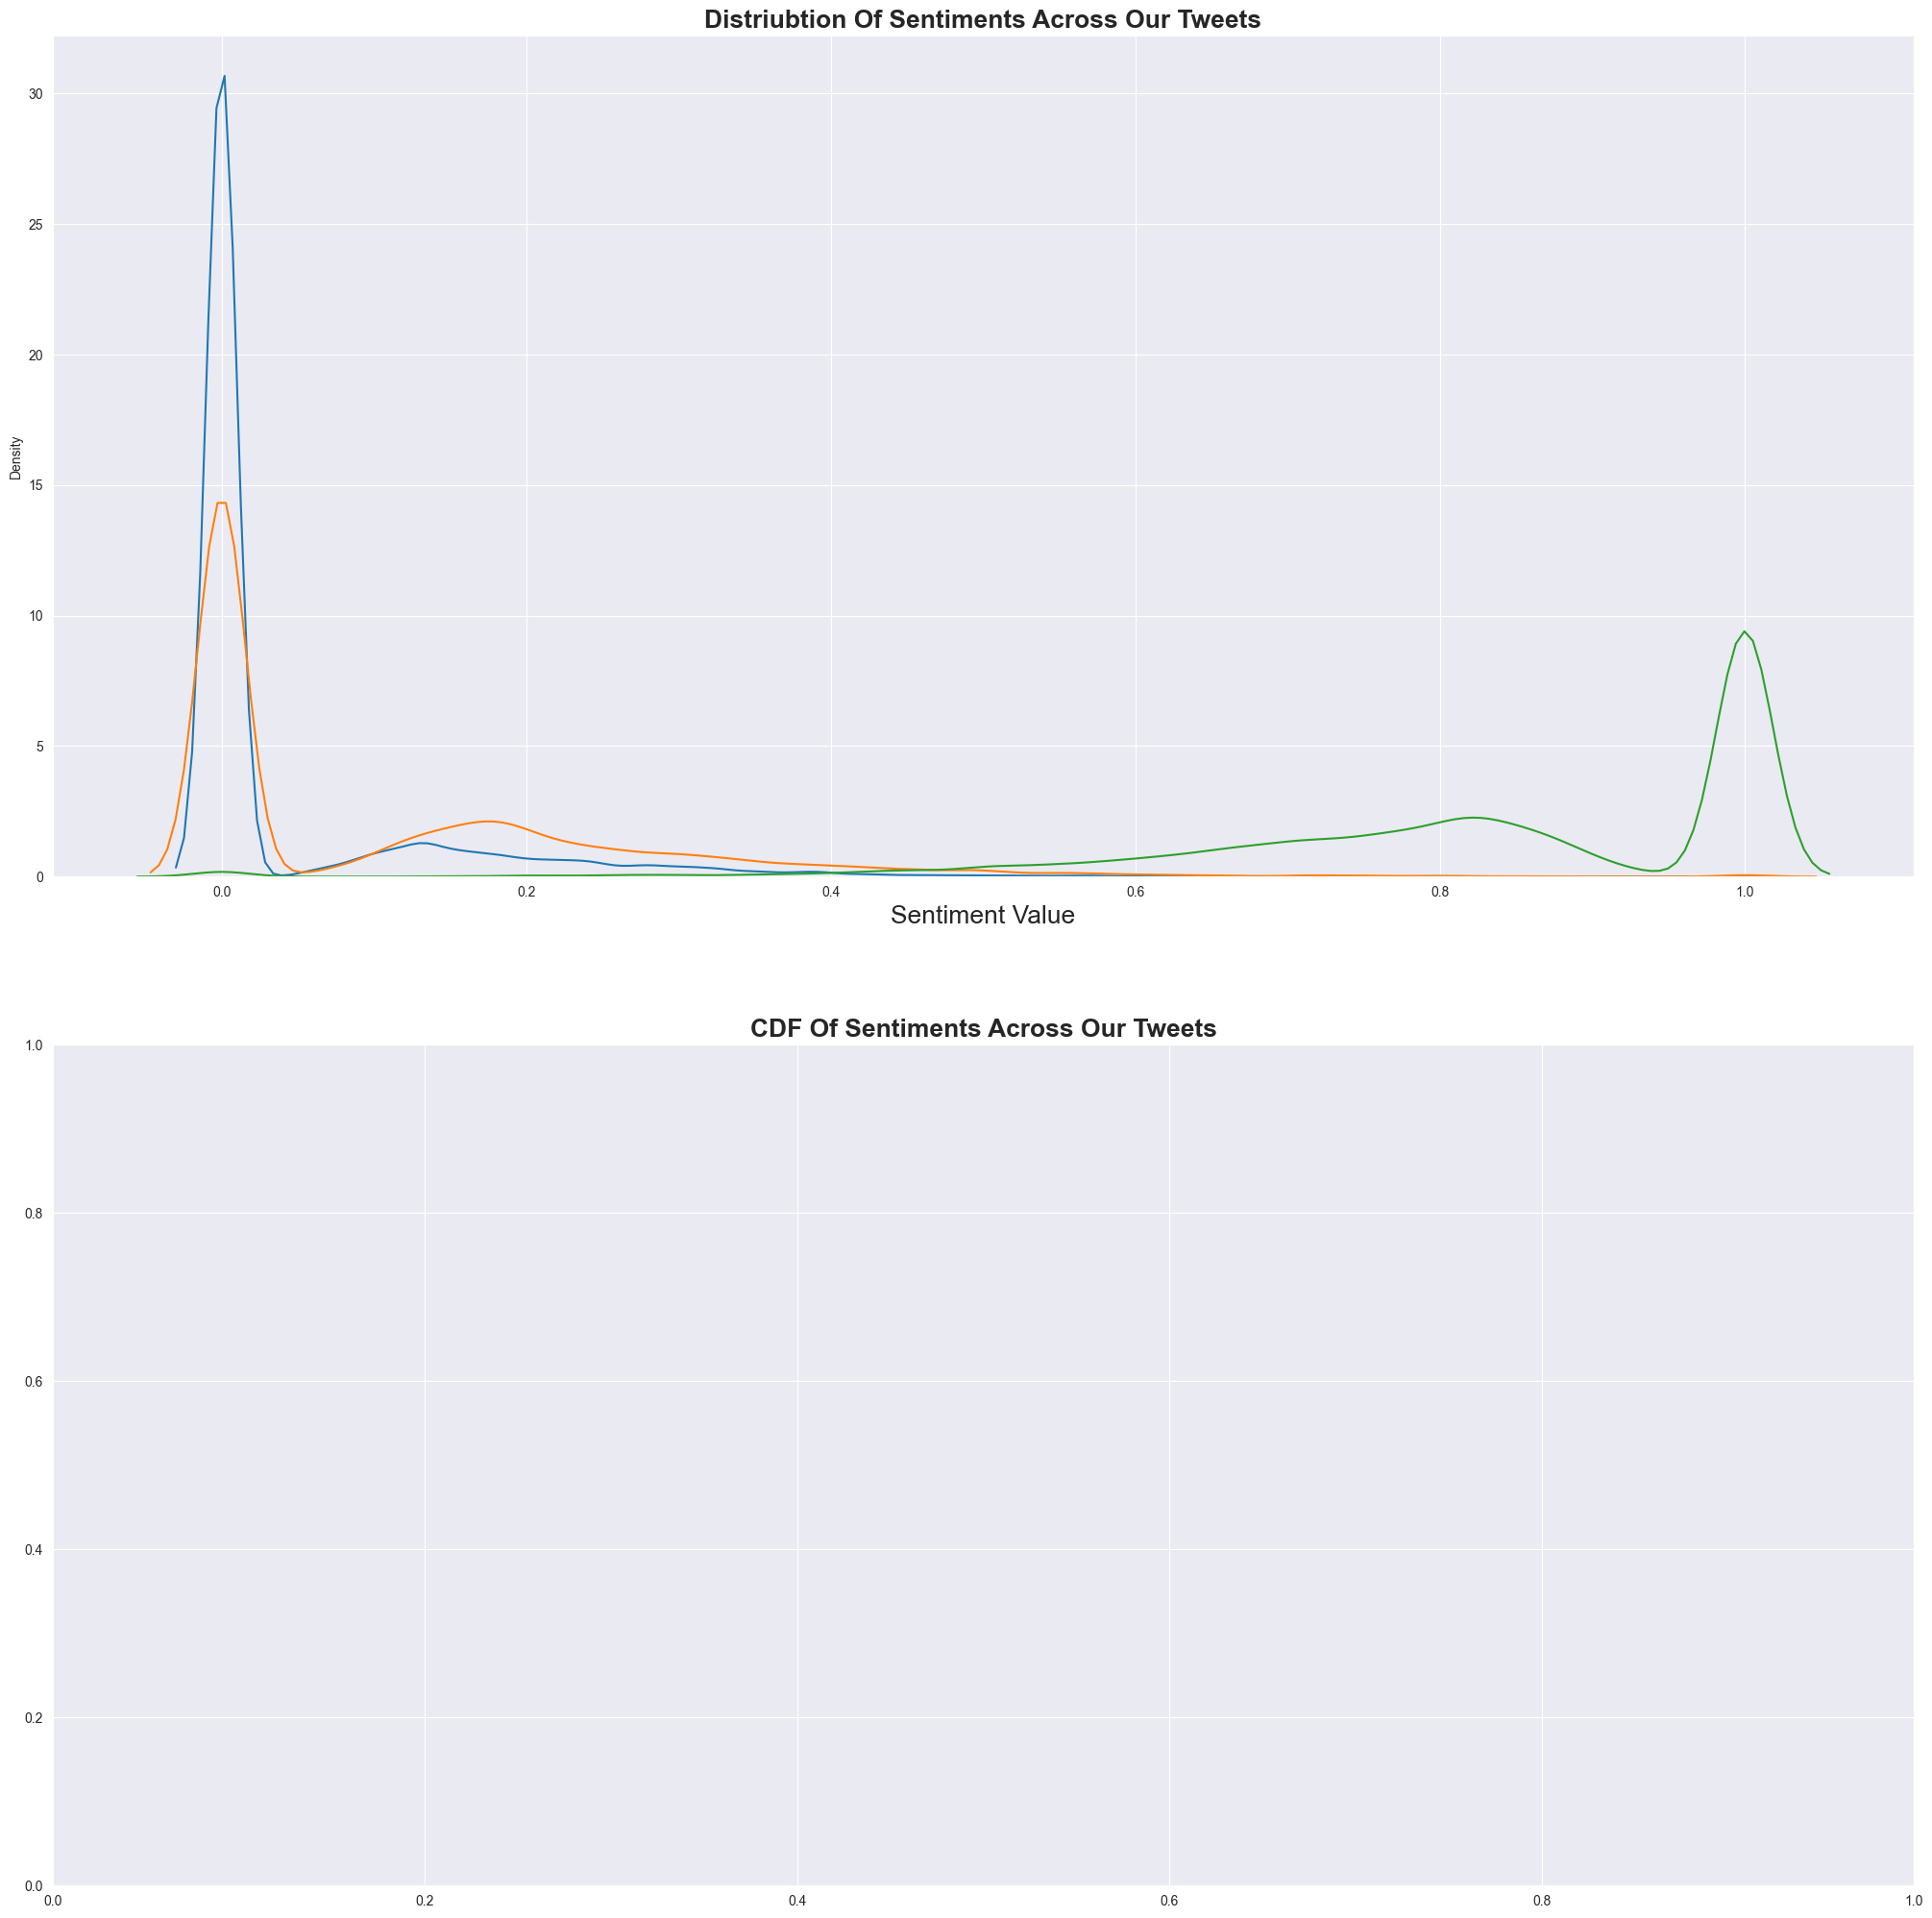

In [14]:
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(f_data['Negative Sentiment'],bw=0.1)
sns.kdeplot(f_data['Positive Sentiment'],bw=0.1)
sns.kdeplot(f_data['Neutral Sentiment'],bw=0.1)
plt.xlabel('Sentiment Value',fontsize=19)
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(f_data['Negative Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(f_data['Positive Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(f_data['Neutral Sentiment'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.show()

<h3>we can observe that the distributions of sentiment follow a normal distribution; negative and positive feelings are very similar, suggesting that there can be no significant differences in the strength of the positive and negative feelings in our data.

It is also clear that the dominant sentiment is neutral; oddly enough, most tweets don’t sound more like neutral positive or negative feelings.

<h1>Now Let’s Analyze Sentiments with Python
<h4>Now let’s start with analyzing the cut off for the most negative sentiments and the most positive sentiments:



/var/folders/t9/k3y3gjjx3kqg2syn0xxdngph0000gn/T/ipykernel_31583/3282500651.py:16: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


/var/folders/t9/k3y3gjjx3kqg2syn0xxdngph0000gn/T/ipykernel_31583/3282500651.py:32: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.




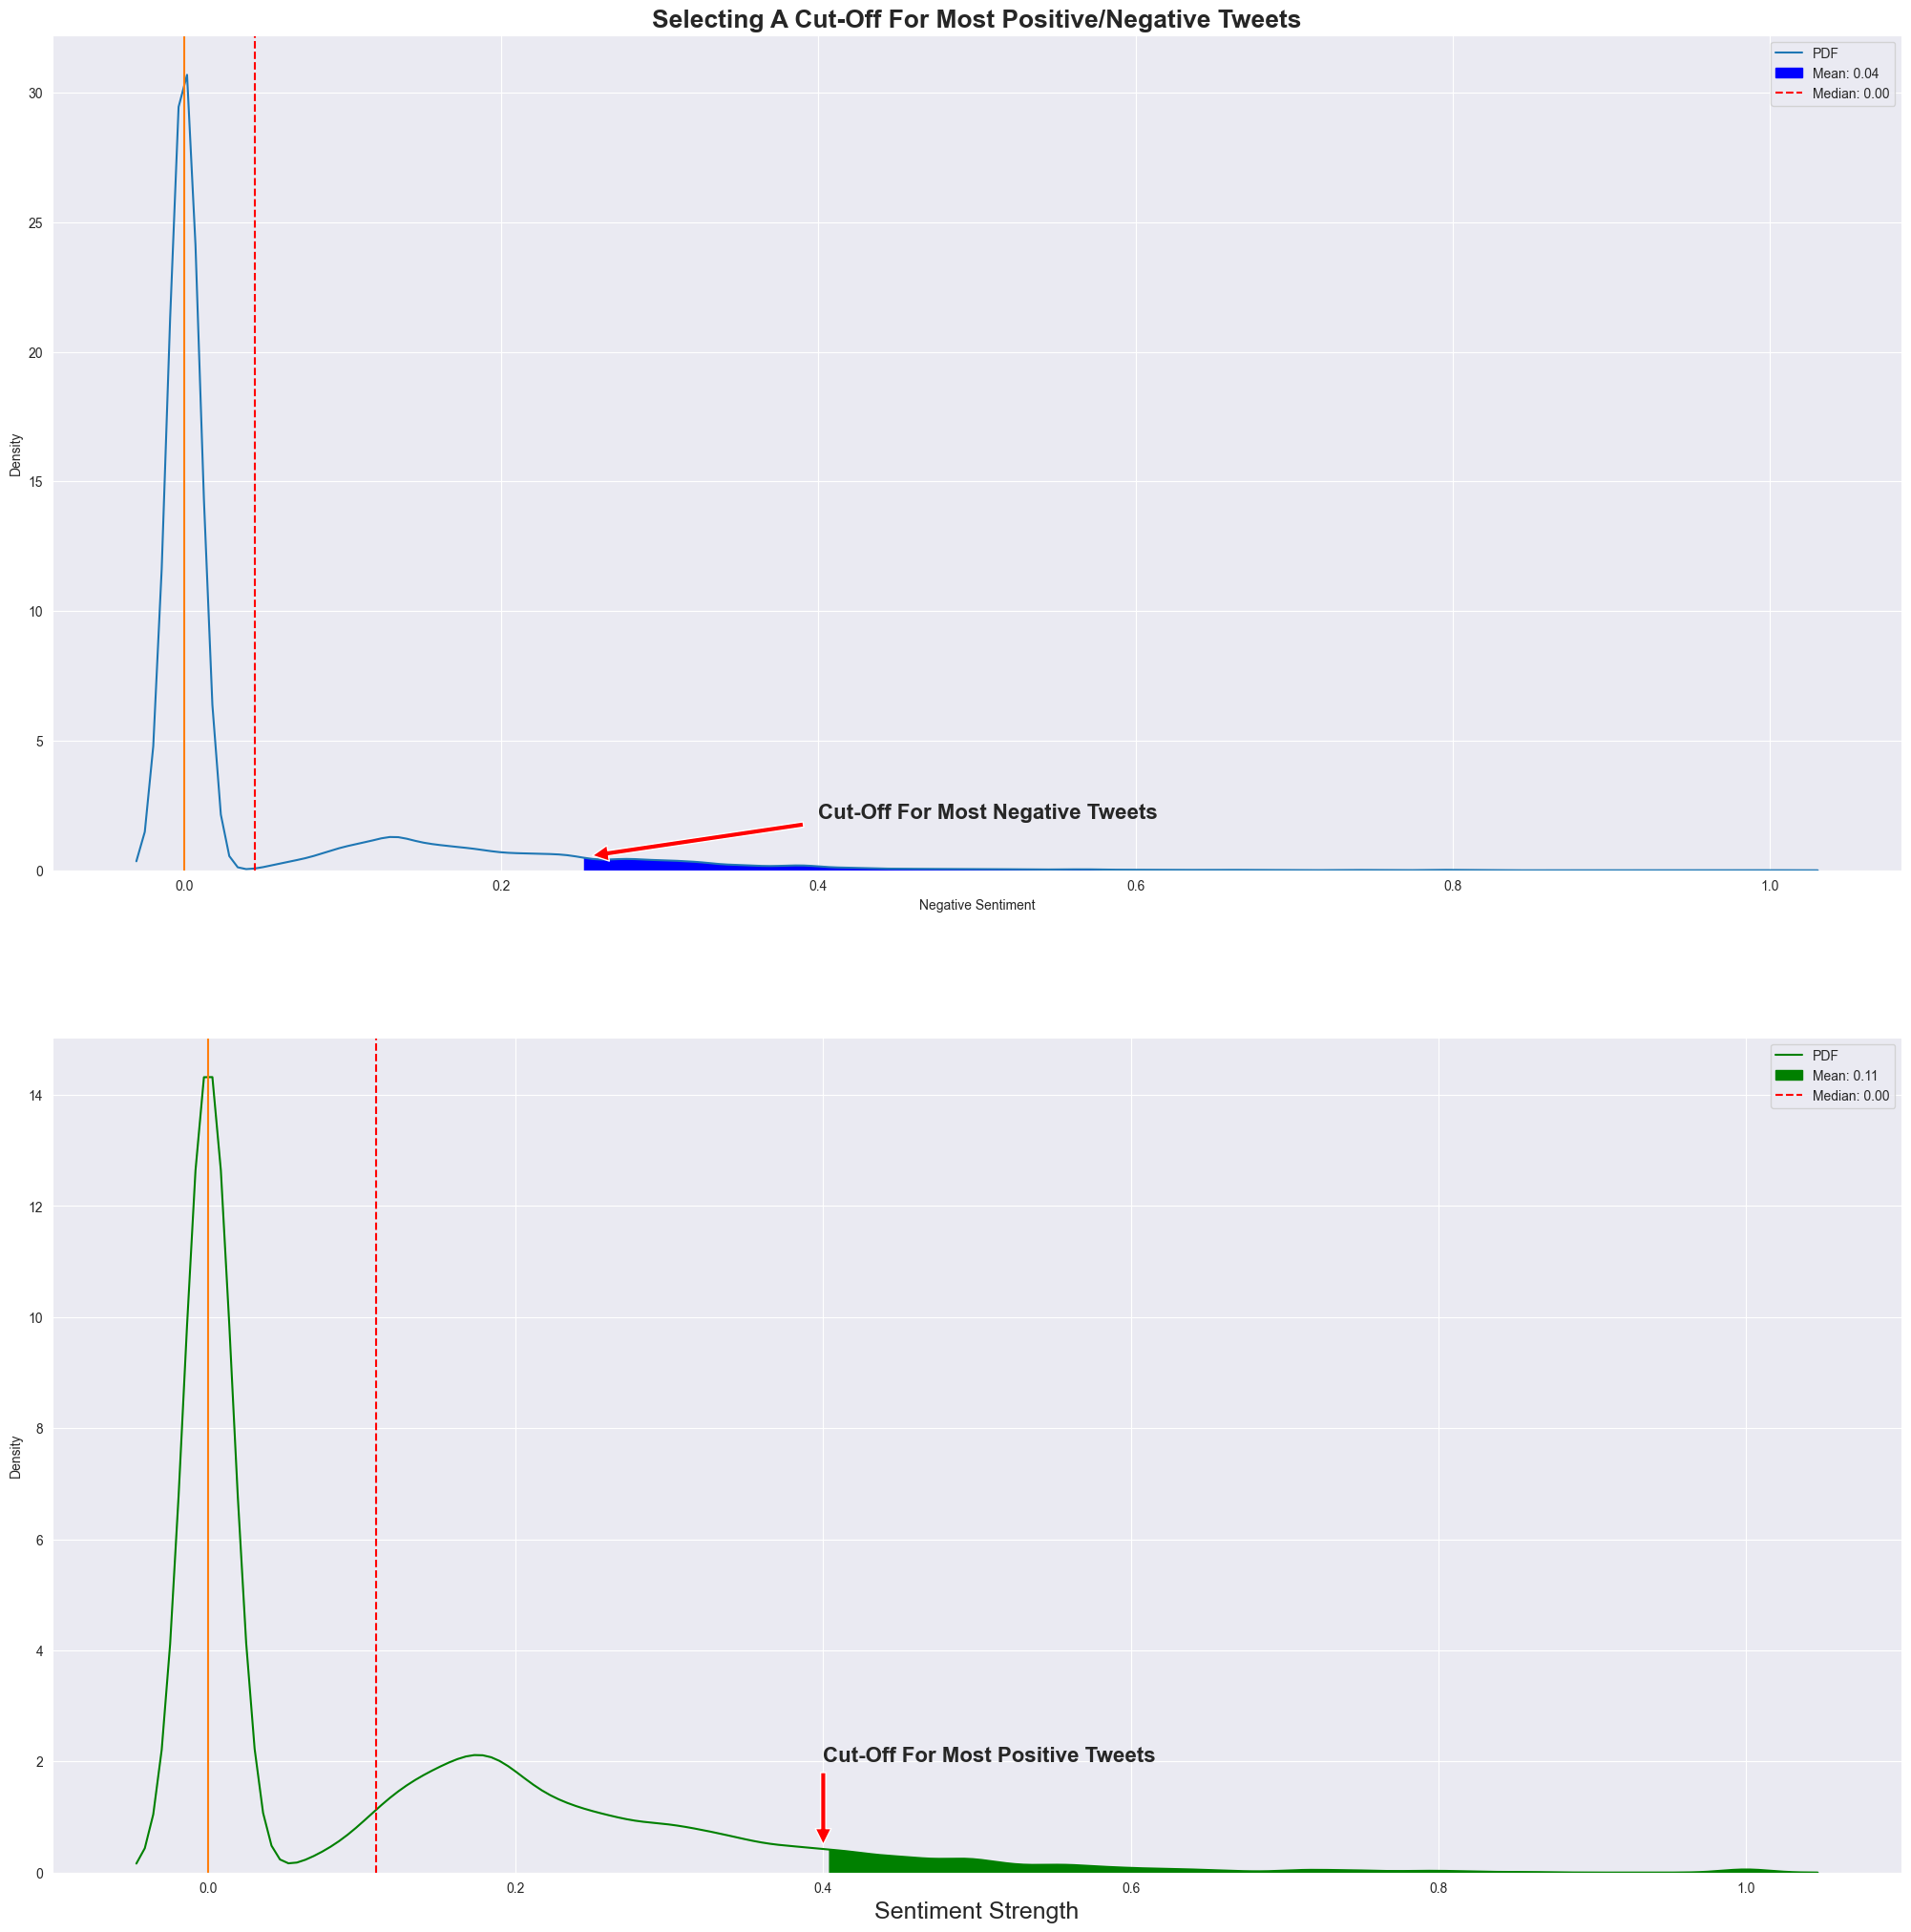

In [15]:
#Sorting And Feature Engineering
f_data = f_data.sort_values(by='date')
ft_data=f_data.copy()
ft_data['date'] = pd.to_datetime(f_data['date']).dt.date

ft_data['year']         = pd.DatetimeIndex(ft_data['date']).year
ft_data['month']        = pd.DatetimeIndex(ft_data['date']).month
ft_data['day']          = pd.DatetimeIndex(ft_data['date']).day
ft_data['day_of_year']  = pd.DatetimeIndex(ft_data['date']).dayofyear
ft_data['quarter']      = pd.DatetimeIndex(ft_data['date']).quarter
ft_data['season']       = ft_data.month%12 // 3 + 1

plt.subplot(2,1,1)
plt.title('Selecting A Cut-Off For Most Positive/Negative Tweets',fontsize=19,fontweight='bold')

ax0 = sns.kdeplot(f_data['Negative Sentiment'],bw=0.1)

kde_x, kde_y = ax0.lines[0].get_data()
ax0.fill_between(kde_x, kde_y, where=(kde_x>0.25) , 
                interpolate=True, color='b')

plt.annotate('Cut-Off For Most Negative Tweets', xy=(0.25, 0.5), xytext=(0.4, 2),
            arrowprops=dict(facecolor='red', shrink=0.05),fontsize=16,fontweight='bold')

ax0.axvline(f_data['Negative Sentiment'].mean(), color='r', linestyle='--')
ax0.axvline(f_data['Negative Sentiment'].median(), color='tab:orange', linestyle='-')
plt.legend({'PDF':f_data['Negative Sentiment'],r'Mean: {:.2f}'.format(f_data['Negative Sentiment'].mean()):f_data['Negative Sentiment'].mean(),
            r'Median: {:.2f}'.format(f_data['Negative Sentiment'].median()):f_data['Negative Sentiment'].median()})

plt.subplot(2,1,2)

ax1 = sns.kdeplot(f_data['Positive Sentiment'],bw=0.1,color='green')

plt.annotate('Cut-Off For Most Positive Tweets', xy=(0.4, 0.43), xytext=(0.4, 2),
            arrowprops=dict(facecolor='red', shrink=0.05),fontsize=16,fontweight='bold')
kde_x, kde_y = ax1.lines[0].get_data()
ax1.fill_between(kde_x, kde_y, where=(kde_x>0.4) , 
                interpolate=True, color='green')
ax1.set_xlabel('Sentiment Strength',fontsize=18)


ax1.axvline(f_data['Positive Sentiment'].mean(), color='r', linestyle='--')
ax1.axvline(f_data['Positive Sentiment'].median(), color='tab:orange', linestyle='-')
plt.legend({'PDF':f_data['Positive Sentiment'],r'Mean: {:.2f}'.format(f_data['Positive Sentiment'].mean()):f_data['Positive Sentiment'].mean(),
            r'Median: {:.2f}'.format(f_data['Positive Sentiment'].median()):f_data['Positive Sentiment'].median()})

plt.show()

<h2>Now let’s visualize the most negative and the most positive sentiments:


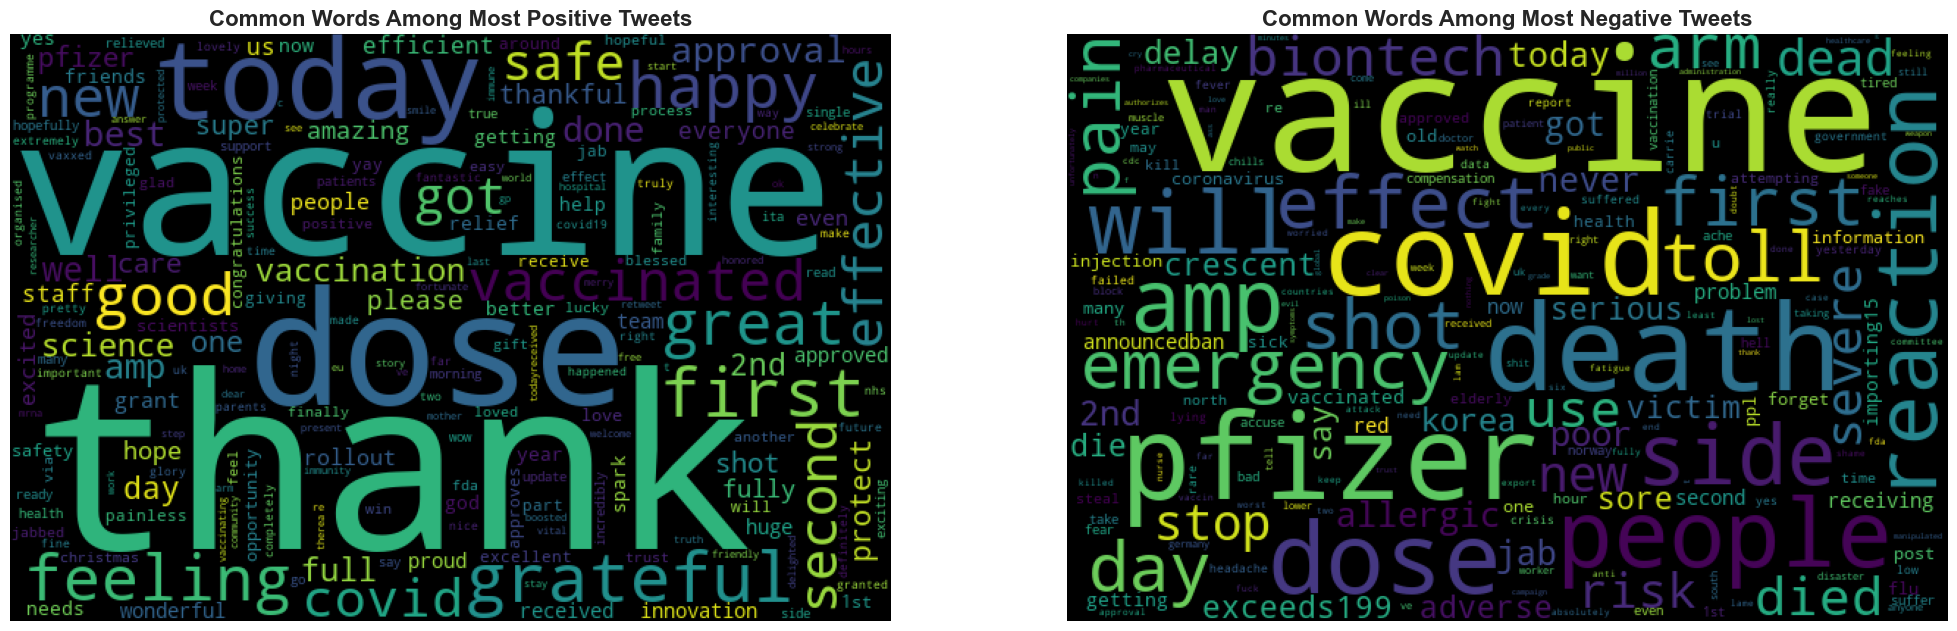

In [16]:

Most_Positive = f_data[f_data['Positive Sentiment'].between(0.4,1)]
Most_Negative = f_data[f_data['Negative Sentiment'].between(0.25,1)]

Most_Positive_text = ' '.join(Most_Positive.text)
Most_Negative_text = ' '.join(Most_Negative.text)


pwc = WordCloud(width=600,height=400,collocations = False).generate(Most_Positive_text)
nwc = WordCloud(width=600,height=400,collocations = False).generate(Most_Negative_text)

plt.subplot(1,2,1)
plt.title('Common Words Among Most Positive Tweets',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Most Negative Tweets',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

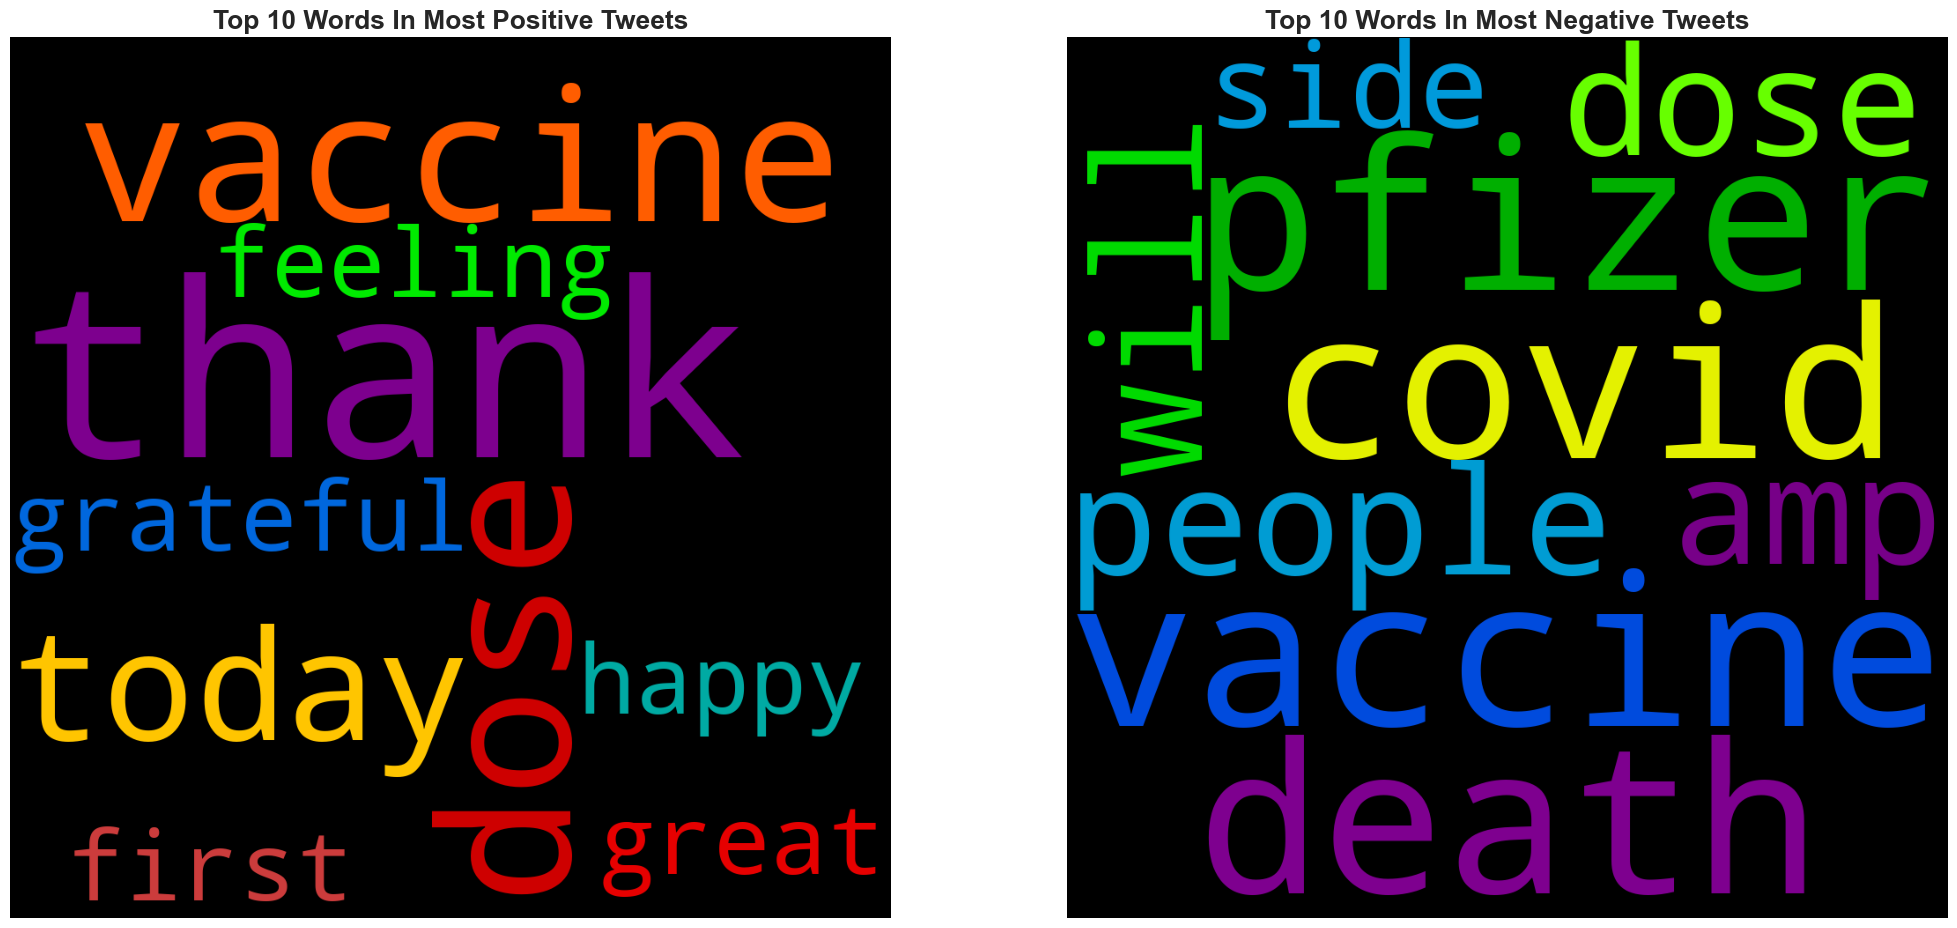

In [17]:
l_t = Most_Positive_text

w1_dict = dict()
for word in l_t.split():
    w= word.strip()
    if w in STOPWORDS:
        continue
    else:
        w1_dict[w] = w1_dict.get(w,0)+1
w1_dict = {k: v for k, v in sorted(w1_dict.items(), key=lambda item: item[1],reverse=True)}

l_t = Most_Negative_text
w2_dict = dict()
for word in l_t.split():
    w= word.strip()
    if w in STOPWORDS:
        continue
    else:
        w2_dict[w] = w2_dict.get(w,0)+1
w2_dict = {k: v for k, v in sorted(w2_dict.items(), key=lambda item: item[1],reverse=True)}

top_10_pos = list(w1_dict.keys())[:10]
top_10_neg = list(w2_dict.keys())[:10]

plt.subplot(1,2,1)
w_c = WordCloud(width=1000,height=1000,collocations = False,colormap='nipy_spectral').generate(' '.join(top_10_pos))
plt.title('Top 10 Words In Most Positive Tweets',fontsize=19,fontweight='bold')
plt.imshow(w_c)
plt.axis('off')
plt.subplot(1,2,2)
w_c = WordCloud(width=1000,height=1000,collocations = False,colormap='nipy_spectral').generate(' '.join(top_10_neg))
plt.title('Top 10 Words In Most Negative Tweets',fontsize=19,fontweight='bold')
plt.imshow(w_c)
plt.axis('off')
plt.show()

<h1>Now let’s have a look at the correlation between the tweets and the other numeric features in the dataset:

In [18]:
ex.imshow(f_data[['user_followers','user_friends','user_favourites','user_verified','Positive Sentiment',
                  'Neutral Sentiment','Negative Sentiment']].corr('spearman'),title='Spearman Correlation')

Unfortunately, we don’t see any significant correlation between the sentiment of the tweet and any other numeric characteristic given in our data set, especially those that describe users. I hope you liked this article on a data science project on Covid-19 vaccine analysis with Python. Feel free to ask your valuable questions in the comments section below.